**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 2**

In [1]:
# download the data
! rm daily.csv* && wget http://covidtracking.com/api/states/daily.csv

--2020-04-16 02:52:09--  http://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 138.68.244.143, 2604:a880:2:d0::1546:5001
Connecting to covidtracking.com (covidtracking.com)|138.68.244.143|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295154 (288K) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>] 288.24K  --.-KB/s    in 0.001s  

2020-04-16 02:52:09 (232 MB/s) - ‘daily.csv’ saved [295154/295154]



In [2]:
#import what we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Using `pandas` along with the up-to-date covidtracking.com data plot:

1) the number of new positive cases reported each day for California versus New York and 

2) the number of new positive cases reported each day for Oregon versus Washington.  Note that this is different than the "positive" column in the data which records the cumulative number of positive cases to that day.

In [3]:
# get data and display in a table
x = pd.read_csv('daily.csv')

# let pandas know we are using a date in date column
x['date']=pd.to_datetime(x['date'],format='%Y%m%d')
x.set_index(['date'],inplace=True)
x

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-04-15,AK,293.0,8371.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,...,34.0,8664.0,8664.0,8664.0,2,0.0,2.0,308.0,8.0,316.0
2020-04-15,AL,4113.0,29964.0,NaN,NaN,525.0,NaN,219.0,NaN,134.0,...,525.0,34077.0,34077.0,34077.0,1,11.0,32.0,723.0,237.0,960.0
2020-04-15,AR,1569.0,20265.0,NaN,83.0,130.0,NaN,43.0,26.0,39.0,...,130.0,21834.0,21834.0,21834.0,5,3.0,0.0,614.0,89.0,703.0
2020-04-15,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
2020-04-15,AZ,3962.0,41348.0,NaN,590.0,NaN,286.0,NaN,202.0,NaN,...,NaN,45310.0,45310.0,45310.0,4,11.0,0.0,1058.0,156.0,1214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,MI,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,9.0,9.0,26,NaN,NaN,NaN,NaN,NaN
2020-03-01,RI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,44,NaN,NaN,NaN,NaN,NaN
2020-03-01,WA,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,30.0,30.0,53,3.0,0.0,0.0,12.0,12.0


## Part 1: # of New Positive Cases Reported Each Day for NY, CA

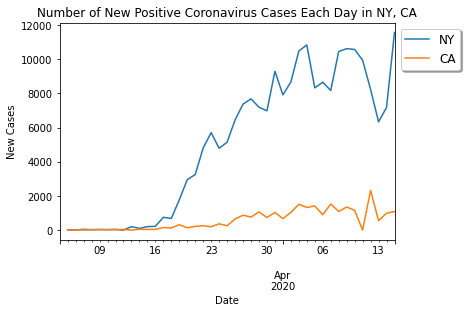

In [4]:
ny = 'NY'
ca = 'CA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == ny]['positiveIncrease'].plot()
x[x['state'] == ca]['positiveIncrease'].plot()

# set labels, title, legend
axes.set_title('Number of New Positive Coronavirus Cases Each Day in NY, CA')
axes.set_ylabel('New Cases')
axes.set_xlabel('Date')
axes.legend([ny,ca], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1), shadow = True)

## Part 2: # of New Positive Cases Reported Each Day for OR, WA

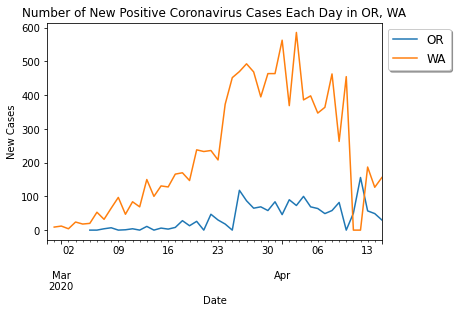

In [5]:
ore = 'OR'
wa = 'WA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == ore]['positiveIncrease'].plot()
x[x['state'] == wa]['positiveIncrease'].plot()

# set labels, title, legend
axes.set_title('Number of New Positive Coronavirus Cases Each Day in OR, WA')
axes.set_ylabel('New Cases')
axes.set_xlabel('Date')
axes.legend([ore,wa], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1), shadow = True)

# Question 2

Tracking the progress of social distancing. In the week2 notebook we looked at how the rate of increase in the number of new positive cases seems to be flattening in New York State. 

1) On March 19th the Govenor of California ordered a state-wide lockdown-- did this have an effect on the rate of transimission? To examine this, split the data from California to before and after March 19th and ask if doubling times are different. Present this in two, clearly-labelled plots, each showing log transformed counts of positive cases over time. 

2) Do the same thing for Washington state which had it's lockdown imposed on March 24th. Has transmission rate changed much before and after this date?


## Part 1: Doubling Times of CA Before/After March 19, 2020 

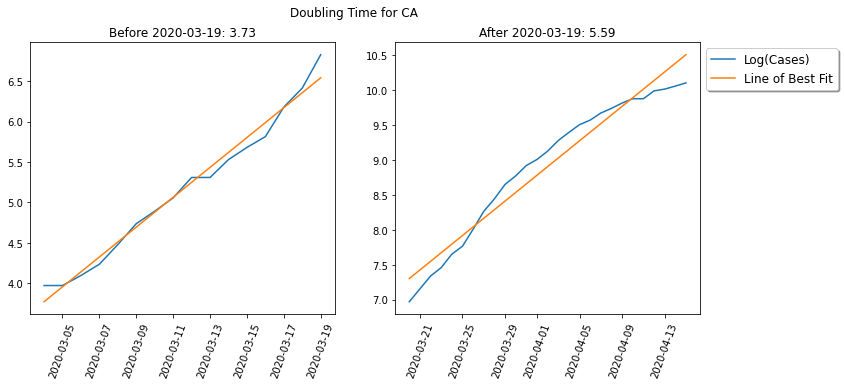

In [6]:
older = x['2020-03-19':]
recent = x[:'2020-03-19']
ca = 'CA'
data = [older, recent]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
i = 0
for z in data:
    ca_log = np.log(z[z['state'] == ca]['positive']) # log tranform counts
    day = np.linspace(len(ca_log),1,len(ca_log)) # make array of day numbers
    slope, intercept = np.polyfit(day,ca_log,1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(ca_log.index,ca_log) # plot log(cases)
    ax[i].plot(ca_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    if i == 0:  # set subtitles for clarification
        ax[i].set_title(f"Before 2020-03-19: {round(0.69/slope, 2)}")
    else:
        ax[i].set_title(f"After 2020-03-19: {round(0.69/slope, 2)}")
    i+=1
    
# some graphic stuffs
plt.suptitle(f"Doubling Time for {ca}")  # set the title
plt.legend(['Log(Cases)','Line of Best Fit'], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1), shadow=True)

Doubling time has increased by a few days... which is at least an improvement!

## Part 1: Doubling Times of WA Before/After March 24, 2020 

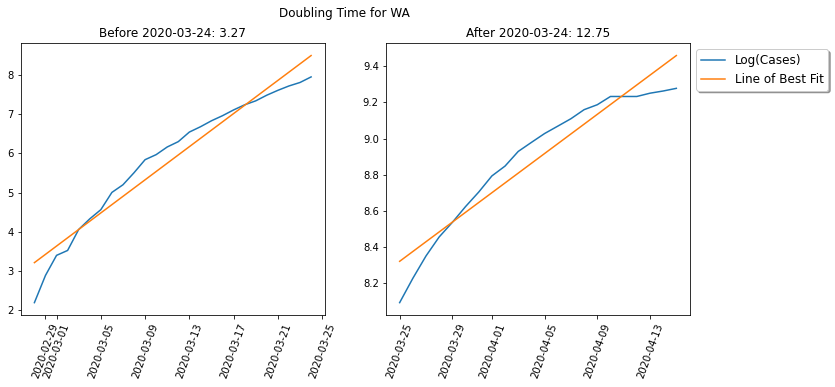

In [7]:
older = x['2020-03-24':]
recent = x[:'2020-03-24']
wa = 'WA'
data = [older, recent]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5)) # stretched the graphs so dates weren't overlapping
i = 0
for z in data:
    wa_log = np.log(z[z['state'] == wa]['positive']) # log tranform counts
    day = np.linspace(len(wa_log),1,len(wa_log)) # make array of day numbers
    slope, intercept = np.polyfit(day,wa_log,1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(wa_log.index,wa_log) # plot log(cases)
    ax[i].plot(wa_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    if i == 0:  # set subtitles for clarification
        ax[i].set_title(f"Before 2020-03-24: {round(0.69/slope, 2)}")
    else:
        ax[i].set_title(f"After 2020-03-24: {round(0.69/slope, 2)}")
    i+=1
    
# some graphic stuffs
plt.suptitle(f"Doubling Time for {wa}")  # set the title
plt.legend(['Log(Cases)','Line of Best Fit'], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1), shadow=True)

Doubling time has increased significantly! 